In [1]:
#import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

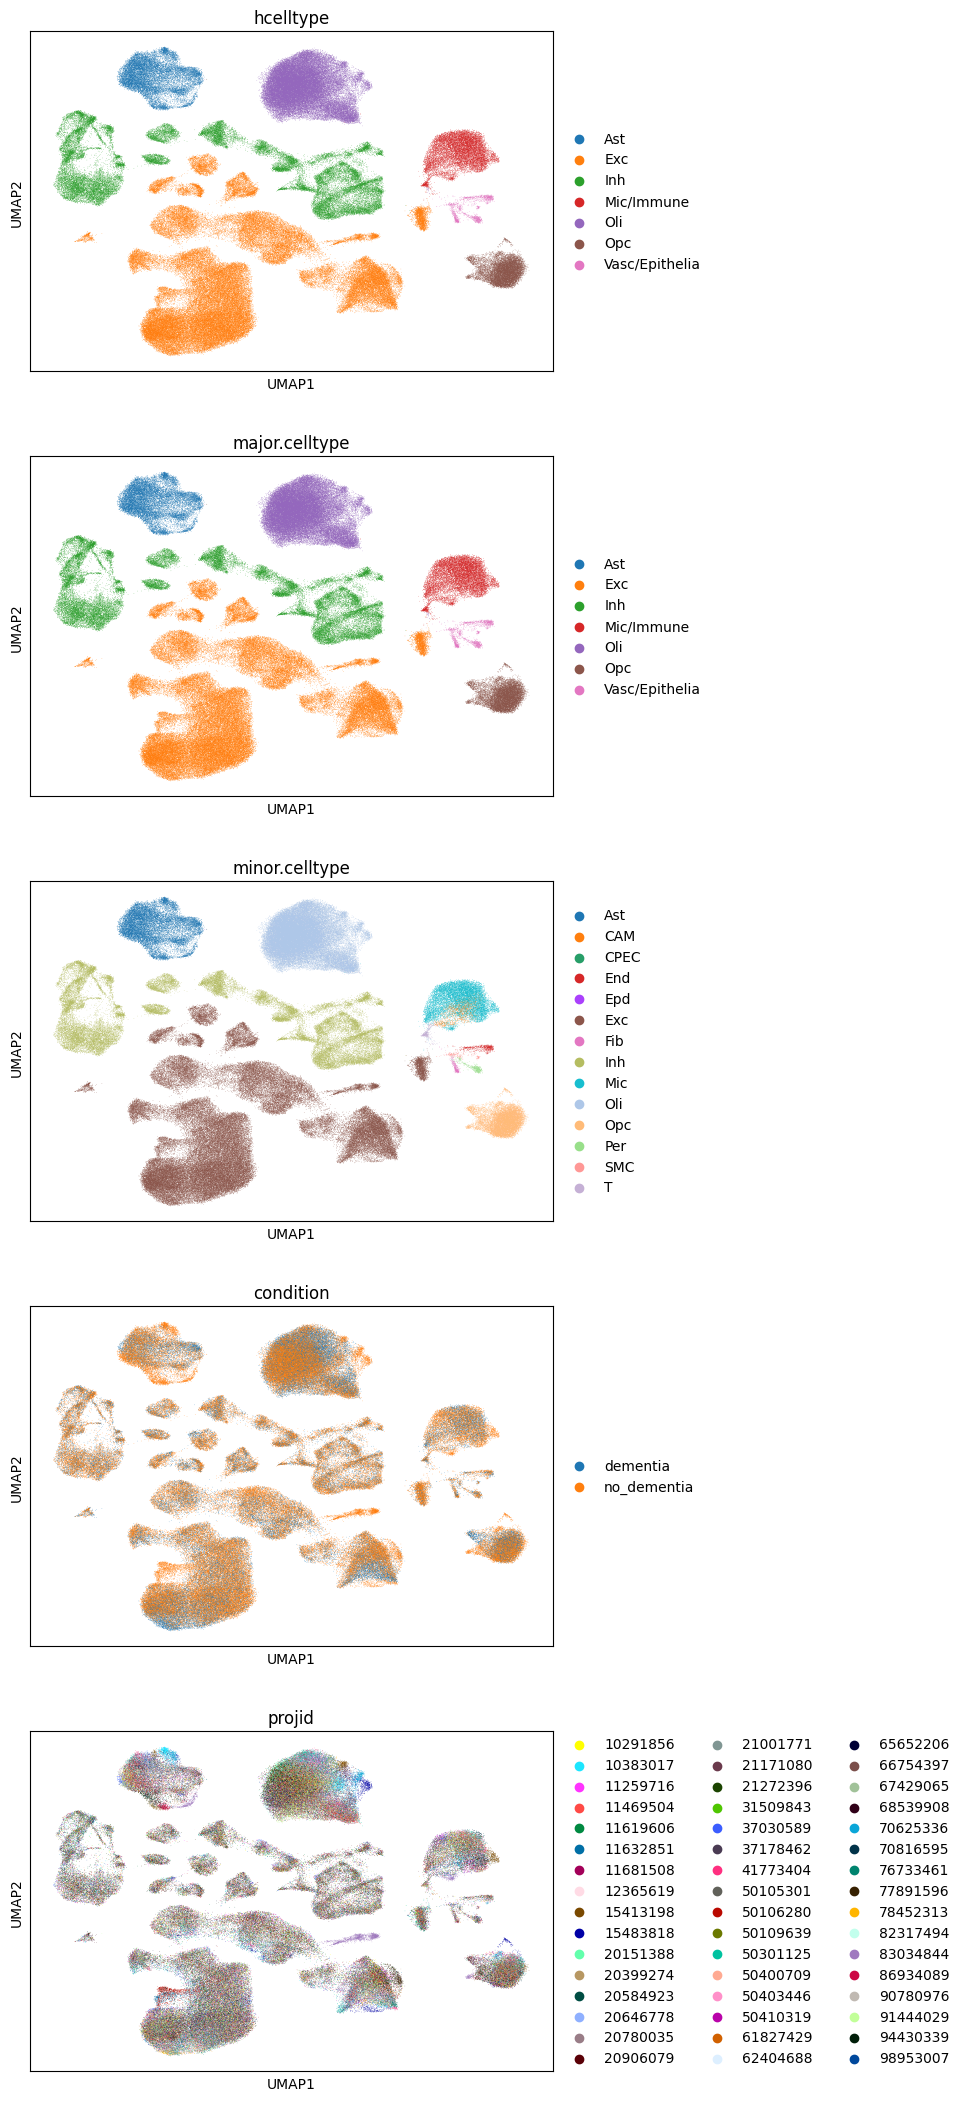

In [5]:
adata=sc.read_h5ad("./data/ROSMAP.h5ad")
adata.raw = None
adata.obs['projid'] = adata.obs['projid'].astype(str)
sc.pl.umap(adata,color=["hcelltype","major.celltype","minor.celltype","condition","projid"],ncols=1)

In [7]:
print(np.unique(adata.obs["condition"].values.tolist()))
print(np.unique(adata.obs["projid"].values.tolist()))

['dementia' 'no_dementia']
['10291856' '10383017' '11259716' '11469504' '11619606' '11632851'
 '11681508' '12365619' '15413198' '15483818' '20151388' '20399274'
 '20584923' '20646778' '20780035' '20906079' '21001771' '21171080'
 '21272396' '31509843' '37030589' '37178462' '41773404' '50105301'
 '50106280' '50109639' '50301125' '50400709' '50403446' '50410319'
 '61827429' '62404688' '65652206' '66754397' '67429065' '68539908'
 '70625336' '70816595' '76733461' '77891596' '78452313' '82317494'
 '83034844' '86934089' '90780976' '91444029' '94430339' '98953007']


In [8]:
print(adata.shape)

(227412, 2314)


In [ ]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key="condition", contorl_name='no_dementia', num_hvg=2314, require_batch=True,
                            batch_key="projid",
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=8192, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ROSMAP/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ROSMAP/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()


model.get_modifier_space()
model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)